# Alzheimer detection from MRI ( Magnetic resonance imaging )

## What is Alzheimer? 

Alzheimer's disease is the most common type of dementia. It is a progressive disease beginning with mild memory loss and possibly leading to loss of the ability to carry on a conversation and respond to the environment. Alzheimer's disease involves parts of the brain that control thought, memory, and language.

## What are the warning signs of Alzheimer’s disease?

Alzheimer’s disease is not a normal part of aging. Memory problems are typically one of the first warning signs of Alzheimer’s disease and related dementias.

In addition to memory problems, someone with symptoms of Alzheimer’s disease may experience one or more of the following:

- Memory loss that disrupts daily life, such as getting lost in a familiar place or repeating questions.
- Trouble handling money and paying bills.
- Difficulty completing familiar tasks at home, at work or at leisure.
- Decreased or poor judgment.
- Misplacing things and being unable to retrace steps to find them.
- Changes in mood, personality, or behavior.


## Alezheimer´s stages

There are five stages associated with Alzheimer's disease: preclinical Alzheimer's disease, mild cognitive impairment due to Alzheimer's disease, mild dementia due to Alzheimer's disease, moderate dementia due to Alzheimer's disease and severe dementia due to Alzheimer's disease.

If you want to learn more about Alzheimer, check this website --> 'https://www.alz.org/alzheimer_s_dementia'

# DEFINITION OF THE PROJECT


## Alzheimer´s Dataset

The dataset is organized into 2 folders (train, test) and contains subfolders for each image category (NonDemented/ VeryMildDemented/ MildDemented/ ModerateDemented). There are 5120 images(2.291 NonDemented, 1794 VeryMildDemented, 788 MildDemented, 247 ModerateDemented) in the train set and 1279 images in the test set. 

Source of the Dataset --> 'https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images'

## Goal of the project

This project tries to predict the stage of Alzheimer´s desease working on MRI images. 

For this aim, we are going to use different models of Machine Learning and Deep Learning, such as Logist Regression, Random Forest, CNN... 

# --> CODE 

## -------------    Import the necessary libraries      --------------

In [2]:
# Files and directories

import os
from os import listdir
from os.path import isfile, join

# Json

import json

# DataFrame and Visualization 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Process images

import imageio
import cv2

# Machine learning

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Deep Learning

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback  
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,img_to_array

# Imports from .py files

sys.path.append("../src/utils_")

from utils_.create_df import img_array, concat
from utils_.folders_tb import read_folder
from utils_.visualization_tb import pie_plot, to_percent, show_train
from utils_.mining_data_tb import data_generator

## -------------     Process the data    --------------

### Create DataFrames from the folders 



In [3]:
mild = img_array(0, "train", "MildDemented")
moderate = img_array(1, "train", "ModerateDemented")
non_demented = img_array(2, "train", "NonDemented")
very_mild = img_array(3, "train", "VeryMildDemented")

In [4]:
# Show how many images are there in each folder

len_mild = len(mild)
print("len mild:", len_mild)
len_moderate = len(moderate)
print("len moderate:", len_moderate)
len_non_demented = len(non_demented)
print("len non demented: ", len_non_demented)
len_very_mild = len(very_mild)
print("len very mild: ", len_very_mild)
suma = len_mild + len_moderate + len_non_demented + len_very_mild
print("total:", suma)

len mild: 2218
len moderate: 1552
len non demented:  2560
len very mild:  1792
total: 8122


### Plot the amount of data in each folder

In [5]:
# Convert the amount of images in each folder to percentage 

l1 = to_percent(len_mild)
l2 = to_percent(len_moderate)
l3 = to_percent(len_non_demented)
l4 = to_percent(len_very_mild)

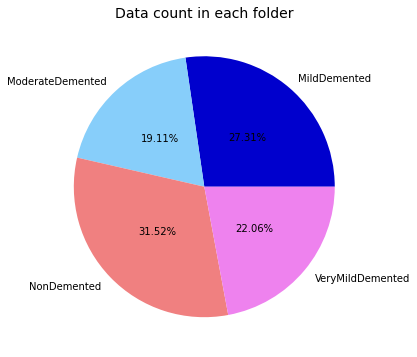

In [6]:
# Plot the amount of data in each folder to see the difference

pie_plot(l1, l2, l3, l4, "Data count in each folder")

As the graphic shows, the amount of data in 'NonDemented' and in 'VeryMildDemented' is much higher than data in 'MildDemented' and 'ModerateDemented'

### Data augmentation

1. MODERATE DEMENTED

In [7]:
X_train = np.stack(np.array(moderate["Image"]))
X_train.shape

(1552, 180, 180, 3)

In [8]:
# This cell creates new images

# DON´T RUN THIS CELL 

""" data_generator(X_train, "ModerateDemented") """ 

' data_generator(X_train, "ModerateDemented") '

2. MILD DEMENTED

In [9]:
X_train = np.stack(np.array(mild["Image"]))
X_train.shape

(2218, 180, 180, 3)

In [10]:
# This cell creates new images

# DON´T RUN THIS CELL

""" data_generator(X_train, "MildDemented") """ 

' data_generator(X_train, "MildDemented") '

## -------------    Create DataFrames from the new folders      --------------

This is going to be used in:  Some Machine Learning Models, Data augmentation, Flask, Streamlit, SQL...

In [11]:
# Create a Df for each folder

mild = img_array(0, "train", "MildDemented")
moderate = img_array(1, "train", "ModerateDemented")
non_demented = img_array(2, "train", "NonDemented")
very_mild = img_array(3, "train", "VeryMildDemented")

### - Repeat the process as we did it before to analize the size of data in each folder

In [12]:
# Show how many images are there in each folder

len_mild = len(mild)
print("len mild:", len_mild)
len_moderate = len(moderate)
print("len moderate:", len_moderate)
len_non_demented = len(non_demented)
print("len non demented: ", len_non_demented)
len_very_mild = len(very_mild)
print("len very mild: ", len_very_mild)
suma = len_mild + len_moderate + len_non_demented + len_very_mild
print("total:", suma)

len mild: 2218
len moderate: 1552
len non demented:  2560
len very mild:  1792
total: 8122


In [13]:
# Convert the amount of images in each folder to percentage 

l1 = to_percent(len_mild)
l2 = to_percent(len_moderate)
l3 = to_percent(len_non_demented)
l4 = to_percent(len_very_mild)

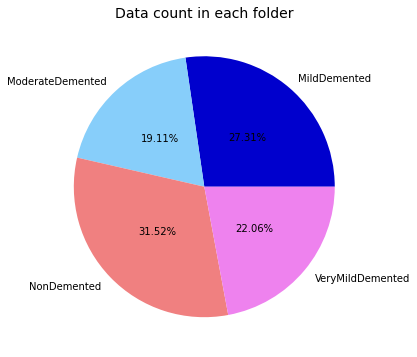

In [14]:
# Plot the amount of data in each folder to see the difference

pie_plot(l1, l2, l3, l4, "Data count in each folder")

- Now the amount of data in each folder is more or less equal

In [15]:
# Concat all the Dataframes in one

df = concat(mild, moderate, non_demented, very_mild)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8122 entries, 0 to 1791
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image     8122 non-null   object
 1   Label     8122 non-null   int64 
 2   Fullpath  8122 non-null   object
 3   Folder    8122 non-null   object
 4   Size      8122 non-null   object
dtypes: int64(1), object(4)
memory usage: 380.7+ KB


## -------------     Read folders      --------------

Read images from the folders. The label is the folder`s name 

Class names: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [16]:
# Separate in train and val set

train_ds = read_folder("training", "train")
val_ds = read_folder("validation", "train")

Found 8122 files belonging to 4 classes.
Using 6498 files for training.
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
Found 8122 files belonging to 4 classes.
Using 1624 files for validation.
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


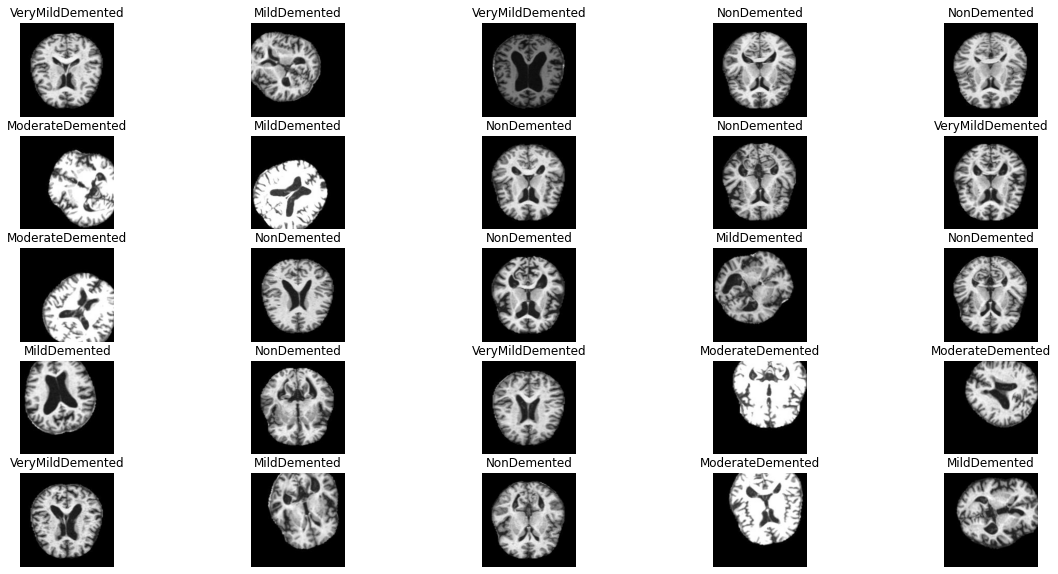

In [17]:
# Show some of the images with their labels contained in the train set

show_train(train_ds)

In [18]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=16,  # nº de neuronas
                        kernel_size=(3, 3), 
                        input_shape=(180, 180, 3), 
                        padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), 
                              padding="same"),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(), # Preprocesamiento/Te lo transforma a vector
    keras.layers.Dense(128, activation='relu'), # Una capa con 128 neuronas
    keras.layers.Dense(4, activation="softmax") # Una capa con 4 neuronas porque hay 4 clases
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               16588928  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 16,589,892
Trainable params: 16,589,892
Non-trainable params: 0
____________________________________________

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5, verbose=True)

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(train_ds,
                    validation_data = val_ds,
                    callbacks=[early_stop],
                    epochs = 10,
                    verbose=1)

Epoch 1/10
204/204 [==============================] - 62s 299ms/step - loss: 281.1042 - accuracy: 0.3429 - val_loss: 1.3816 - val_accuracy: 0.3122
Epoch 2/10
204/204 [==============================] - 63s 309ms/step - loss: 1.3825 - accuracy: 0.3169 - val_loss: 1.3755 - val_accuracy: 0.3122
Epoch 3/10
204/204 [==============================] - 62s 306ms/step - loss: 1.3717 - accuracy: 0.3167 - val_loss: 1.3725 - val_accuracy: 0.3122
Epoch 4/10
204/204 [==============================] - 63s 307ms/step - loss: 1.3690 - accuracy: 0.3159 - val_loss: 1.3714 - val_accuracy: 0.3122
Epoch 5/10
204/204 [==============================] - 62s 305ms/step - loss: 1.3680 - accuracy: 0.3159 - val_loss: 1.3711 - val_accuracy: 0.3122
Epoch 6/10
204/204 [==============================] - 61s 299ms/step - loss: 1.3676 - accuracy: 0.3159 - val_loss: 1.3711 - val_accuracy: 0.3122
Epoch 7/10
204/204 [==============================] - 62s 301ms/step - loss: 1.3674 - accuracy: 0.3159 - val_loss: 1.3712 - val_

In [33]:
dire = os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "test" + os.sep + "NonDemented"

def read_data(path):
    X = []
    for file in os.listdir(path):
        image = cv2.imread(path + '/' + file, flags=cv2.IMREAD_COLOR)
        smallimage = cv2.resize(image, (180, 180))
        
        X.append(smallimage)

    return np.array(X)
    

x_test = read_data(dire)

# Procesar las imagenes tal y como entran en el modelo
x_test = preprocess_input(x_test)
print(x_test.shape)

(640, 180, 180, 3)


In [34]:
preds = model.predict(x_test)
x = np.argmax(preds[10])
x

3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

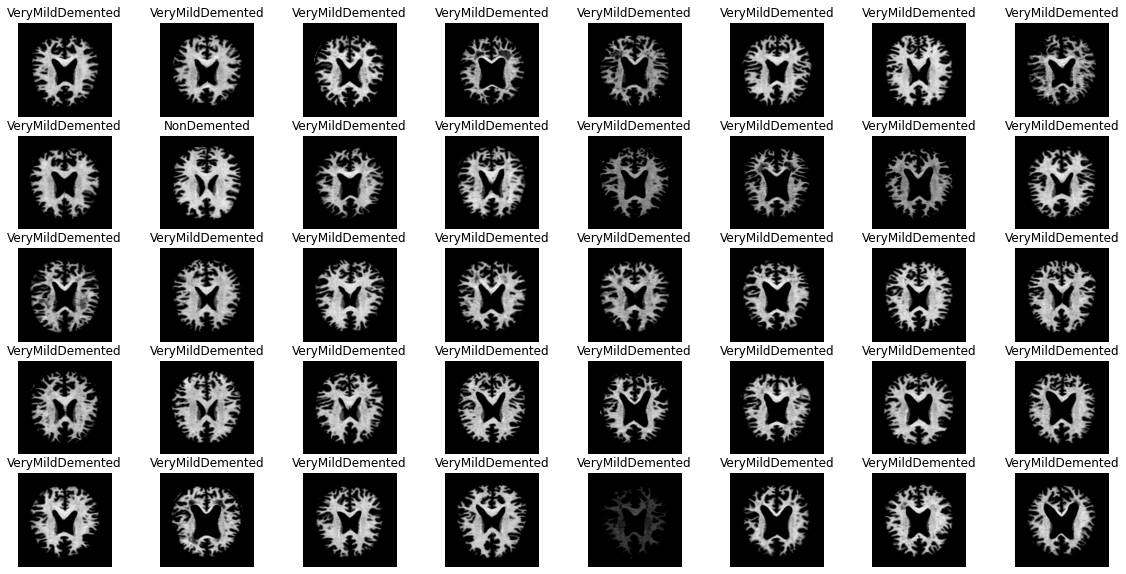

In [35]:
plt.figure(figsize=(20, 10))
for i in range(40):
    ax = plt.subplot(5, 8, i + 1)
    plt.imshow(x_test[i])
    plt.title(train_ds.class_names[np.argmax(preds[i])])
    plt.axis("off")